<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_PyTorch/blob/master/210811_ch10_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

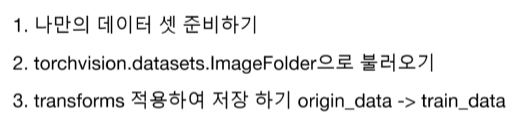

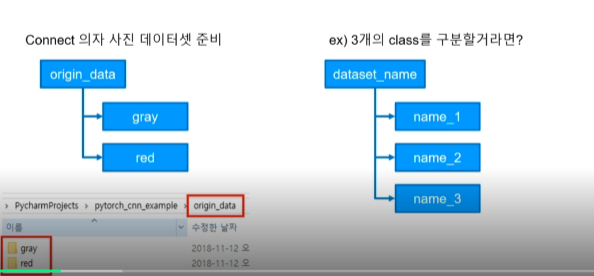

데이터 소스: https://aihub.or.kr/aidata/27674

In [ ]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
trans = transforms.Compose([
    transforms.Resize((64,128))
])

train_data = torchvision.datasets.ImageFolder(root='/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/', transform=trans)

In [ ]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/train_data/bibimbap/%d_%d.jpeg'%(num, label))
    else:
        data.save('/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/train_data/bread/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B7107290> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B7090890> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78AE050> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B7167910> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78AAC50> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F271DB050D0> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B7167910> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78AAF90> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78AAC50> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78B7690> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B78AE050> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B70E7F50> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B72A8450> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B72A82D0> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F26B7

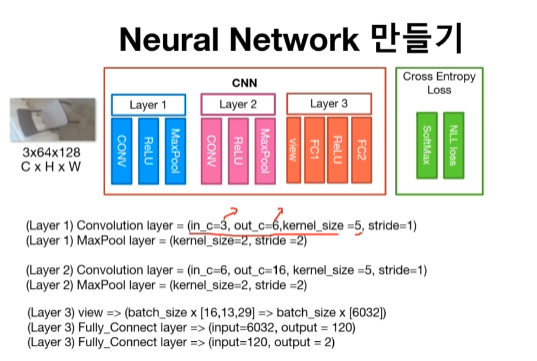

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(555)
if device =='cuda':
  print('cuda')
  torch.cuda.manual_seed_all(555)

cuda


In [ ]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
trans = transforms.Compose([
                           transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root='/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/train_data', transform=trans)

In [ ]:
data_loader = DataLoader(dataset = train_data, batch_size = 8, shuffle=True, num_workers=2)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.layer3(out)
        return out

In [ ]:
# testing
net = CNN().to(device)
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

In [ ]:
total_batch = len(data_loader)

epochs = 7
for epoch in range(epochs):
  avg_cost = 0.0
  for num, data in enumerate(data_loader):
    imgs, labels = data
    imgs = imgs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    out = net(imgs)
    loss = loss_func(out, labels)
    loss.backward()
    optimizer.step()

    avg_cost += loss/total_batch
  print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')

[Epoch:1] cost = 0.6863296627998352
[Epoch:2] cost = 0.6695111989974976
[Epoch:3] cost = 0.6470308303833008
[Epoch:4] cost = 0.6266499757766724
[Epoch:5] cost = 0.6080371737480164
[Epoch:6] cost = 0.5774111747741699
[Epoch:7] cost = 0.5397723913192749
Learning Finished!


In [ ]:
# 매번 학습하지 않고 저장해서 사용
torch.save(net.state_dict(), '/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/model/model.pth')

In [ ]:
# 새로운 이름으로 저장한 모델 불러온다
new_net = CNN().to(device)

In [ ]:
new_net.load_state_dict(torch.load('/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/model/model.pth'))

<All keys matched successfully>

In [ ]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([ 0.0923, -0.0923,  0.0450,  0.0952, -0.0476], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([ 0.0923, -0.0923,  0.0450,  0.0952, -0.0476], device='cuda:0',
       grad_fn=<SelectBackward>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]], device='cuda:0')

In [ ]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='/gdrive/My Drive/Colab_Notebooks/ALML/pytorch_zerotoall/data_cnn/test_data', transform=trans)

In [ ]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [ ]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 0.925000011920929


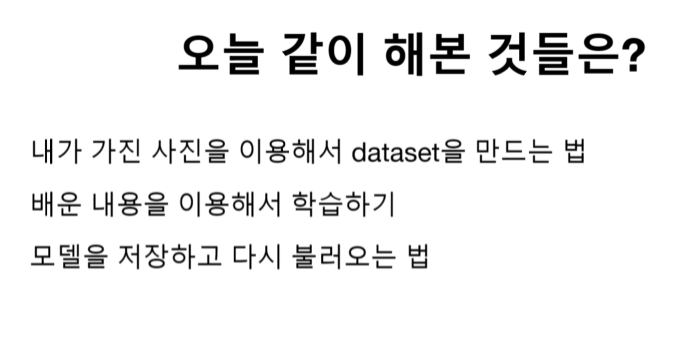